# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [316]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

Text(0, 0.5, 'E (Netwons/Coulomb)')

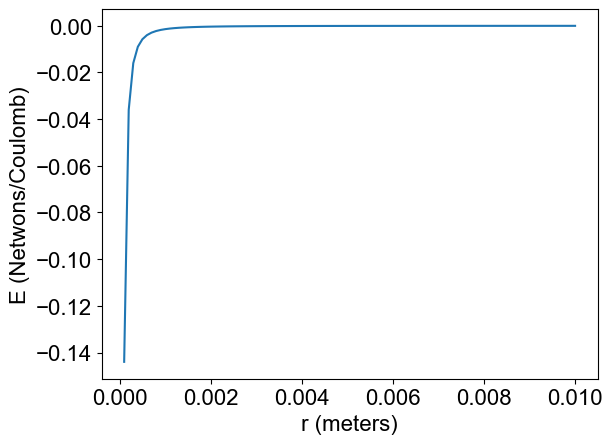

In [276]:
k= 1/(4* np.pi * constants.epsilon_0)
def E(q,r):
    return k*q/r**2

r=np.linspace(.0001, .01, num=100)

plt.plot(r, E(-constants.e, r))
plt.xlabel('r (meters)')
plt.ylabel('E (Netwons/Coulomb)')

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0, 0.5, "c' (m/s)")

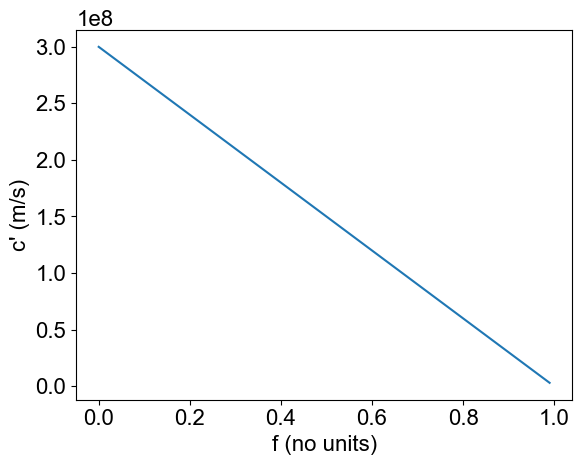

In [336]:
#f= fraction of the speed of light
def c_prime(f):
    return (constants.c - f*constants.c)

f= np.linspace(0, 1, num=100, endpoint=False)

plt.plot(f, c_prime(f))
plt.xlabel('f (no units)')
plt.ylabel("c' (m/s)")

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0.5, 0, 'f (no units)')

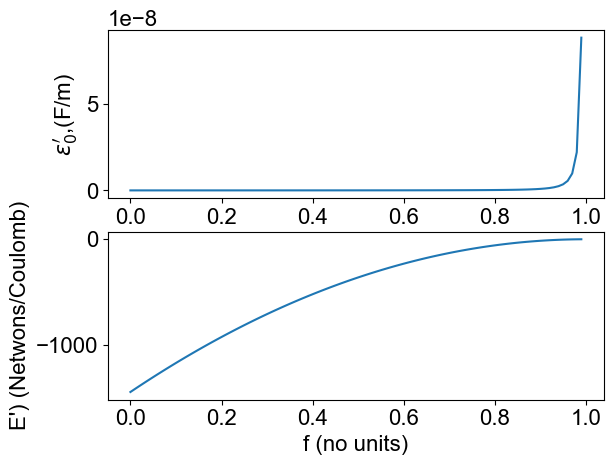

In [339]:
r_prime=10**-6

def c_prime(f):
    return (constants.c - f*constants.c)

def epsilon_0_prime(f):
    return 1/(constants.mu_0 * c_prime(f)**2)

def E_prime(c_prime): 
    return -constants.e/(4 * np.pi * epsilon_0_prime(c_prime) * r_prime**2)

plt.subplot(211)
plt.plot(f,epsilon_0_prime(f))
plt.ylabel('$\epsilon_0^{\prime}$,(F/m)')
plt.subplot(212)
plt.plot(f, E_prime(f))
plt.ylabel("E') (Netwons/Coulomb)")
plt.xlabel('f (no units)')

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

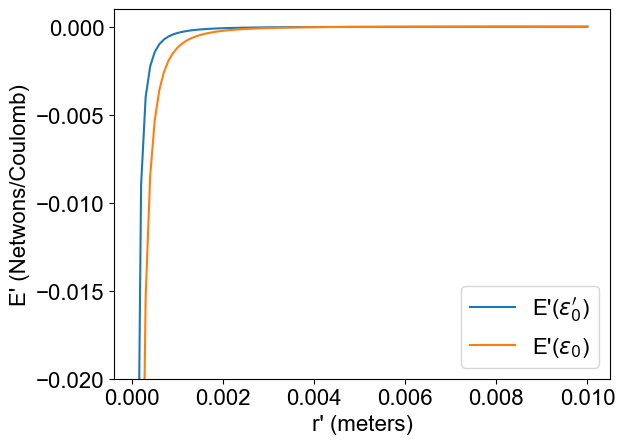

In [342]:
fig, ax = plt.subplots()
r=np.linspace(.0001, .01, num=100)
i=0.5

def E_prime(r_prime, i):
     return -constants.e/(4 * np.pi * epsilon_0_prime(i) * r_prime**2)
    
plt.plot(r, E_prime(r, 0.5), label ="E'($\epsilon_0^{\prime}$)")
plt.plot(r, E_prime(r, f), label = "E'($\epsilon_0$)")
plt.ylim([-0.02, 0.001])
plt.ylabel("E' (Netwons/Coulomb)")
plt.xlabel("r' (meters)")
plt.legend(loc='best')
plt.show()

#COLOR KEY:
#orange = E_prime with f=0.5
#blue= E_prime with epsilon_0_prime(f)

#WRITTEN RESPONSE: The problem with these two plots is that they dont match, suggesting that the Galilean transformation fails.

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

C:\Users\amand\AppData\Local\Temp\ipykernel_24540\4057927595.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(constants.epsilon_0 * c_prime(f)**2)


Text(0, 0.5, '$\\mu_0^{\\prime}$, (Netwons/Ampere$^2$)')

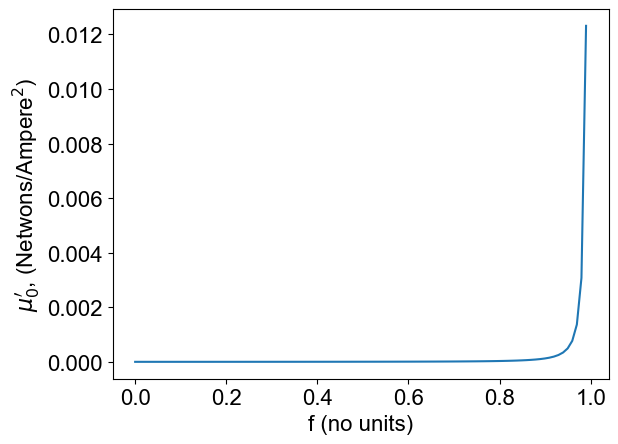

In [328]:
def m_0_prime(f):
    return 1/(constants.epsilon_0 * c_prime(f)**2)

plt.plot(f, m_0_prime(f))
plt.xlabel('f (no units)')
plt.ylabel('$\mu_0^{\prime}$, (Netwons/Ampere$^2$)')

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

C:\Users\amand\AppData\Local\Temp\ipykernel_24540\3643924142.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1/(constants.mu_0 * c_prime(f)**2)


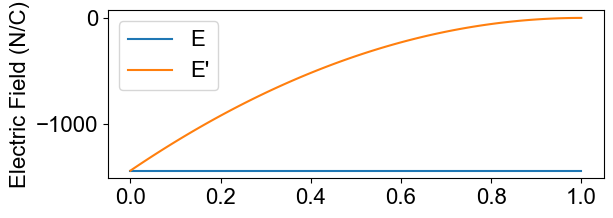

C:\Users\amand\AppData\Local\Temp\ipykernel_24540\4057927595.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(constants.epsilon_0 * c_prime(f)**2)


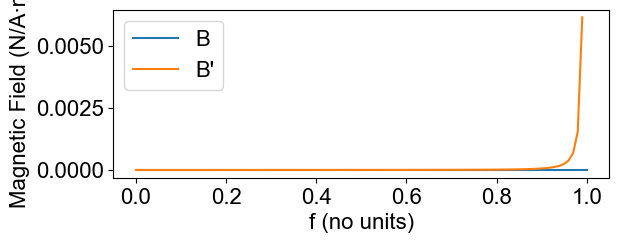

In [331]:
f = np.linspace(0,1, num=100, endpoint=True)
i=10**-6

E_prime_c = -constants.e/(4 * np.pi * constants.epsilon_0 * i**2)
B_prime_c =(constants.mu_0)/2

E=np.linspace(E_prime_c, E_prime_c, num=100, endpoint=True)
B=np.linspace(B_prime_c, B_prime_c, num=100, endpoint=True)

def B_prime(f):
    return m_0_prime(f) / 2
def E_prime(f):
    return (1/(4 * np.pi * epsilon_0_prime(f)) * (-constants.e/(i)**2))

plt.subplot(211)
plt.plot(f, E, label ="E")
plt.plot(f, E_prime(f), label ="E'")
plt.ylabel('Electric Field (N/C)')
plt.legend(loc='best')
plt.show()

plt.subplot(212)
plt.plot(f, B, label ="B")
plt.plot(f, B_prime(f), label="B'")
plt.xlabel('f (no units)')
plt.ylabel('Magnetic Field (N/A∙m)')
plt.legend(loc='best')
plt.show()